In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib

import matplotlib.pyplot as plt

In [3]:
def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)

In [4]:
#Number of atoms

N=200
#---------------------------------------------------------------

Theta = np.pi/2
Phi   = 0

#---------------------------------------------------------------


theta = Theta
phi   = Phi

In [5]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
matrix_array.append(f2z)




#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

In [6]:
tf=100
steps=2500000
t = np.linspace(0,tf,steps)

In [7]:
N

200

In [8]:
gR=1
DeltaR=0
KapR= 15 *gR*sqrt(( (cos(Theta/2))**2 )*N)

fractionR=0.6
OmegaR= fractionR*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))


gL=1
DeltaL=0   
KapL=15 *gL*sqrt(( (sin(Theta/2))**2 )*N)

fractionL=0.6
OmegaL= fractionL*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))

In [9]:

@jit

def f(y, t):
    
    
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    

    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt(2))*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt(2))*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt(2))*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt(2))*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y
            
    ds30xdt = (-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
    ds21xdt = (-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y    
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x
        
    ds0zdt = (sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
    ds1zdt = (sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
    ds2zdt = (-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,19))
    Arr[0][-1]=1
    Arr[0][-2]=1
    Arr[0][-3]=1
    Arr[0][-4]=1
    
    return diag(Arr[0])




In [10]:
""""
result = itoEuler(f, GG, y0, tspan)
result_strat = stratint(f, GG, y0, tspan)
result_robler = itoSRI2(f, GG, y0, tspan)
result_stratKP2iS = stratKP2iS(f, GG, y0, tspan)

"""

'"\nresult = itoEuler(f, GG, y0, tspan)\nresult_strat = stratint(f, GG, y0, tspan)\nresult_robler = itoSRI2(f, GG, y0, tspan)\nresult_stratKP2iS = stratKP2iS(f, GG, y0, tspan)\n\n'

# Improved Euler-Maruyama

In [11]:
@jit

def random_vect(KapR=KapR,KapL=KapL):
    Hu=np.zeros((1,19))
    Hu[0][-1]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-3]=np.sqrt(KapR/4)*np.random.normal()
    Hu[0][-4]=np.sqrt(KapR/4)*np.random.normal()
    
    return Hu



In [12]:
Stochastic=1


@jit



def itoEulerImp(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR,KapL=KapL)
        
        y[n+1] = yn + f(yn, tn)*h + Stochastic*Rand_vectn

    return y



@jit

def SDE_sol():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return itoEulerImp(f, GG, y0, t)

In [13]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =zeros((steps, 19))
    for j in range(itera):
        Trayec=SDE_sol()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [14]:
import time
t0=time.time()

itera=50

Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-13-a654386998d3>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x000001F6B1F8BF70>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x000001F6B1F8BF70>))
During: typing of call at <ipython-input-13-a654386998d3> (12)


File "<ipython-input-13-a654386998d3>", line 12:
def averages_sde(itera=itera,N=N):
    <source elided>
    for j in range(itera):
        Trayec=SDE_sol()
        ^

  @jit
<ipython-input-13-a654386998d3>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-13-a654386998d3>", line 11:
def averages_sde(itera=itera,N=N):
    <source elided>
    Results =zeros((steps, 19

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
122.74792838096619


In [17]:
print(OmegaR/fractionR)

1.3333333333324446


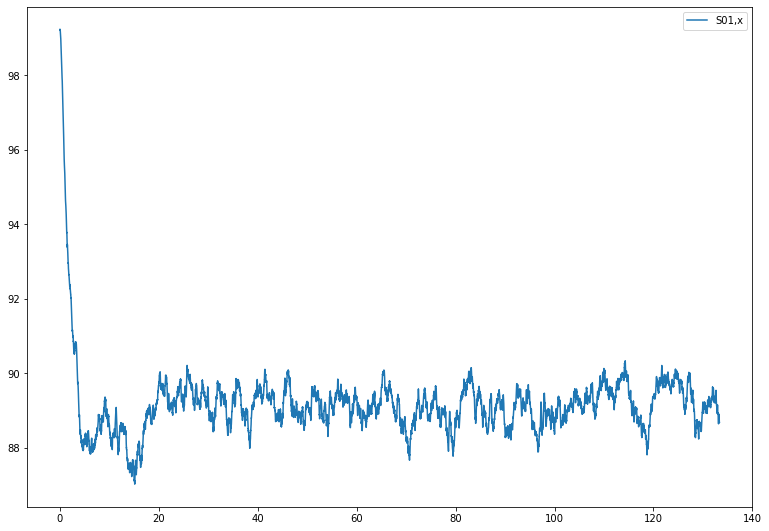

In [18]:
matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


index=12

plt.plot(OmegaR/fractionR*t,Result_varTWA_Col_SDE[:,index]/sqrt(1),label="S01,x")


plt.legend()

In [19]:
VV=Result_varTWA_Col_SDE[:,index]/sqrt(2)

VV[-1]

62.700241326051945

# Mean-Field

In [21]:
dt = (t[-1]-t[0])/(len(t)-1)# Time step.
T = t[-1] # Total time.
n = int(T / dt) # Number of time steps.
steps=int(T/dt)

times = np.linspace(0., T, n)

In [22]:
theta=Theta
phi=Phi


mux10, sigmax10 = (N)*cos(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (cos(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
mux20, sigmax20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux30, sigmax30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux21, sigmax21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux31, sigmax31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux32, sigmax32 = 0                                ,0                                 # mean and standard deviation

muy10, sigmay10 = (N)*sin(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (sin(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
muy20, sigmay20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy30, sigmay30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy21, sigmay21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy31, sigmay31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy32, sigmay32 = 0                                ,0                                 # mean and standard deviation

muz0, sigmaz0 = (N)*(cos(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz1, sigmaz1 = (N)*(sin(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz2, sigmaz2 = 0                      , 0           # mean and standard deviation


@jit

def trayectory_meanfield(N,Stochastic):
    sqrtdt = 0
    
    Results =zeros((19, n))
    
    Results[15][0] = 0
    Results[16][0] = 0
    Results[17][0] = 0
    Results[18][0] = 0
    
    
    Results[0][0] =mux10  #x10  
    Results[1][0] =mux20  #x20
    Results[2][0] =mux30  #x30
    Results[3][0] =mux21  #x21
    Results[4][0] =mux31  #x31
    Results[5][0] =mux32  #x32
        
    Results[6][0] =muy10  #y10
    Results[7][0] =muy20  #y20
    Results[8][0] =muy30  #y30
    Results[9][0] =muy21  #y21
    Results[10][0]=muy31  #y31
    Results[11][0]=muy32  #y32
        
    Results[12][0]=muz0  #z0
    Results[13][0]=muz1  #z1
    Results[14][0]=muz2  #z2
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


Mean_field_res=trayectory_meanfield(N,0)



In [23]:
def partit(array,number):
    j=0
    dis=len(times)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result

reductor=1000

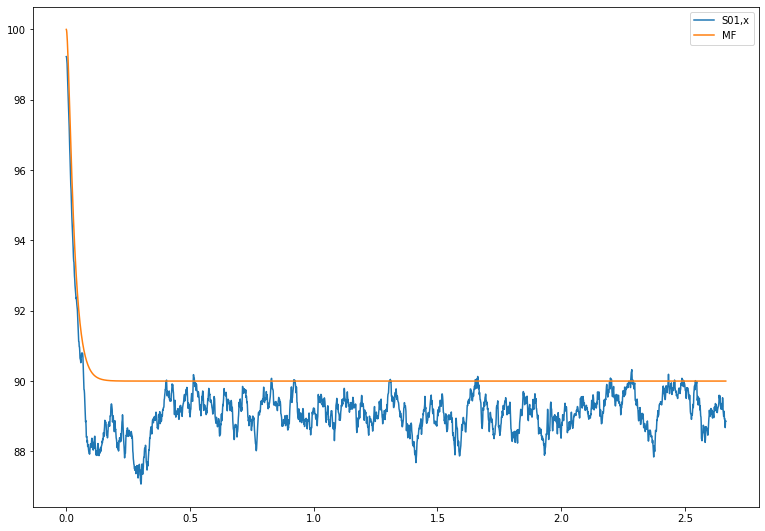

In [53]:
index=12

plt.plot(partit(4*gR**2/KapR*t,reductor),partit(Result_varTWA_Col_SDE[:,index]/sqrt(1),reductor),label="S01,x")


#plt.plot(times,Result_varDDTWA_EM[index],label="Rotated DDTWA")
plt.plot(partit(4*gR**2/KapR*times,reductor),partit(Mean_field_res[index]/sqrt(1),reductor),label="MF")

plt.legend()